<a href="https://colab.research.google.com/github/himanshukumar8/ML_Class_Project..IIITL..--AI_for_Environmental_Monitoring/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import seaborn as sns


In [ ]:
import pandas as pd

# Load the dataset
df_air_quality = pd.read_csv('AirQualityUCI.csv')

# Display the first few rows of the dataset
df_air_quality.head()


,,,,,Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2,6;1360;150;11,9;1046;166;1056;113;1692;1268;13,6;48,9;0,7578;;
10/03/2004;19.00.00;2;1292;112;9,4;955;103;1174;92;1559;972;13,3;47,7;0,7255;;,NaN
10/03/2004;20.00.00;2,2;1402;88;9,0;939;131;1140;114;1555;1074;11,9;54,0;0,7502;;
10/03/2004;21.00.00;2,2;1376;80;9,2;948;172;1092;122;1584;1203;11,0;60,0;0,7867;;
10/03/2004;22.00.00;1,6;1272;51;6,5;836;131;1205;116;1490;1110;11,2;59,6;0,7888;;


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("adityakadiwal/water-potability")

print("Path to dataset files:", path)

100%|██████████| 251k/251k [00:00<00:00, 789kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/adityakadiwal/water-potability/versions/3


In [ ]:
import pandas as pd

# Load the dataset
df_water_quality = pd.read_csv('water_potability.csv')

# Display the first few rows of the dataset
df_water_quality.head()


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("berkeleyearth/climate-change-earth-surface-temperature-data")

print("Path to dataset files:", path)

100%|██████████| 84.7M/84.7M [00:02<00:00, 33.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/versions/2


In [ ]:
import pandas as pd
import zipfile

# Extract the ZIP file
with zipfile.ZipFile('/content/AirQualityUCI.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')

# Load the extracted CSV file
df_air_quality = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], na_values=-200)

# Display the first few rows of the dataset
df_air_quality.head()

# Display the column names
df_air_quality.columns


<ipython-input-26-13753380934e>:9: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df_air_quality = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], na_values=-200)
<ipython-input-26-13753380934e>:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_air_quality = pd.read_csv('/content/AirQualityUCI.csv', sep=';', decimal=',', parse_dates=[['Date', 'Time']], na_values=-200)


Index(['Date_Time', 'CO(GT)', 'PT08.S1(CO)', 'NMHC(GT)', 'C6H6(GT)',
       'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)',
       'PT08.S5(O3)', 'T', 'RH', 'AH', 'Unnamed: 15', 'Unnamed: 16'],
      dtype='object')

In [ ]:
# Drop columns with too many missing values
df_air_quality.dropna(axis=1, thresh=int(0.5*len(df_air_quality)), inplace=True)

# Fill remaining missing values with the mean for numeric columns
numeric_columns = df_air_quality.select_dtypes(include=[np.number]).columns
df_air_quality[numeric_columns] = df_air_quality[numeric_columns].fillna(df_air_quality[numeric_columns].mean())

# Select relevant features for clustering based on the actual column names
X_air_quality = df_air_quality[['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_air_quality_scaled = scaler.fit_transform(X_air_quality)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA
pca_air_quality = PCA(n_components=2)
X_air_quality_pca = pca_air_quality.fit_transform(X_air_quality_scaled)

# Apply K-Means clustering
kmeans_air_quality = KMeans(n_clusters=5, random_state=42)
kmeans_air_quality.fit(X_air_quality_pca)

# Add cluster labels to the dataset
df_air_quality['Cluster'] = kmeans_air_quality.labels_


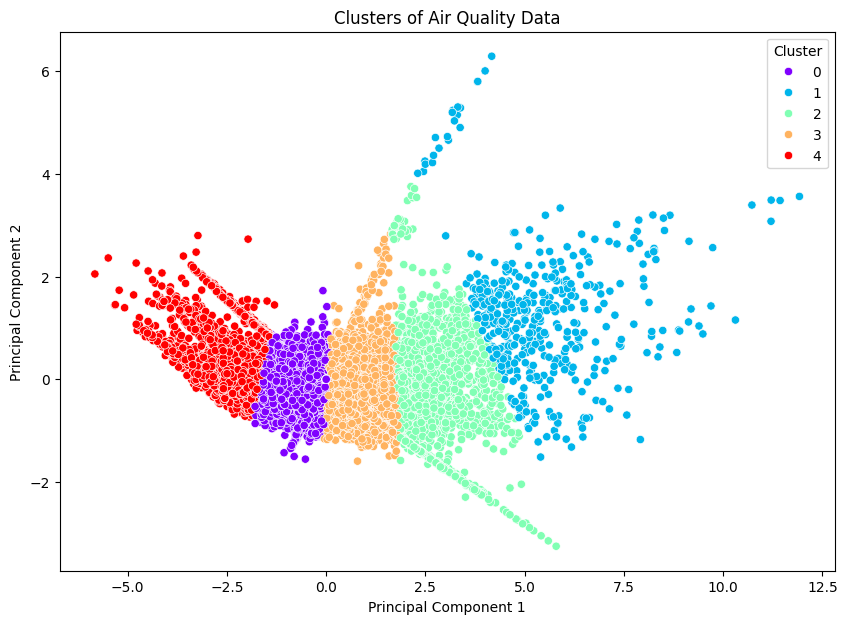

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_air_quality_pca[:, 0], y=X_air_quality_pca[:, 1], hue=df_air_quality['Cluster'], palette='rainbow')
plt.title('Clusters of Air Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
# Check for missing values
df_water_quality.isnull().sum()

# Fill missing values with the mean
df_water_quality.fillna(df_water_quality.mean(), inplace=True)

# Select relevant features for clustering
X_water_quality = df_water_quality[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity']]

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_water_quality_scaled = scaler.fit_transform(X_water_quality)


In [ ]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Apply PCA
pca_water_quality = PCA(n_components=2)
X_water_quality_pca = pca_water_quality.fit_transform(X_water_quality_scaled)

# Apply K-Means clustering
kmeans_water_quality = KMeans(n_clusters=5, random_state=42)
kmeans_water_quality.fit(X_water_quality_pca)

# Add cluster labels to the dataset
df_water_quality['Cluster'] = kmeans_water_quality.labels_


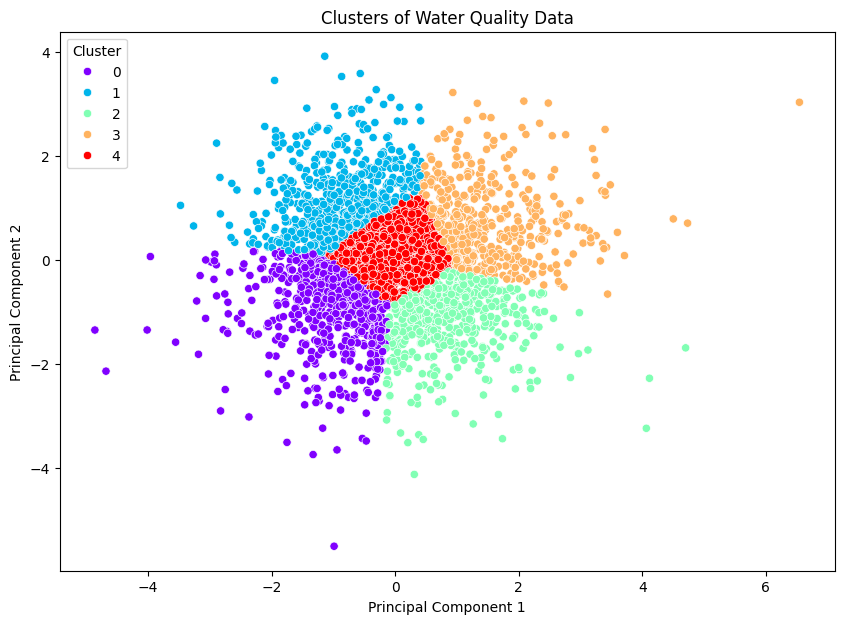

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_water_quality_pca[:, 0], y=X_water_quality_pca[:, 1], hue=df_water_quality['Cluster'], palette='rainbow')
plt.title('Clusters of Water Quality Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
import pandas as pd

# Load the Climate Change dataset
df_climate_change = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

# Display the first few rows of the dataset
df_climate_change.head()


,dt,AverageTemperature,AverageTemperatureUncertainty,Country
0,1743-11-01,4.384,2.294,Åland
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland


In [ ]:
!pip install kaggle


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

# Download the dataset
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data

# Unzip the dataset
!unzip climate-change-earth-surface-temperature-data.zip


Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
License(s): CC-BY-NC-SA-4.0
 85% 72.0M/84.7M [00:00<00:00, 143MB/s]
100% 84.7M/84.7M [00:00<00:00, 119MB/s]
Archive:  climate-change-earth-surface-temperature-data.zip
  inflating: GlobalLandTemperaturesByCity.csv  
  inflating: GlobalLandTemperaturesByCountry.csv  
  inflating: GlobalLandTemperaturesByMajorCity.csv  
  inflating: GlobalLandTemperaturesByState.csv  
  inflating: GlobalTemperatures.csv  


In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/GlobalLandTemperaturesByCountry.csv'  # Update with your dataset file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland


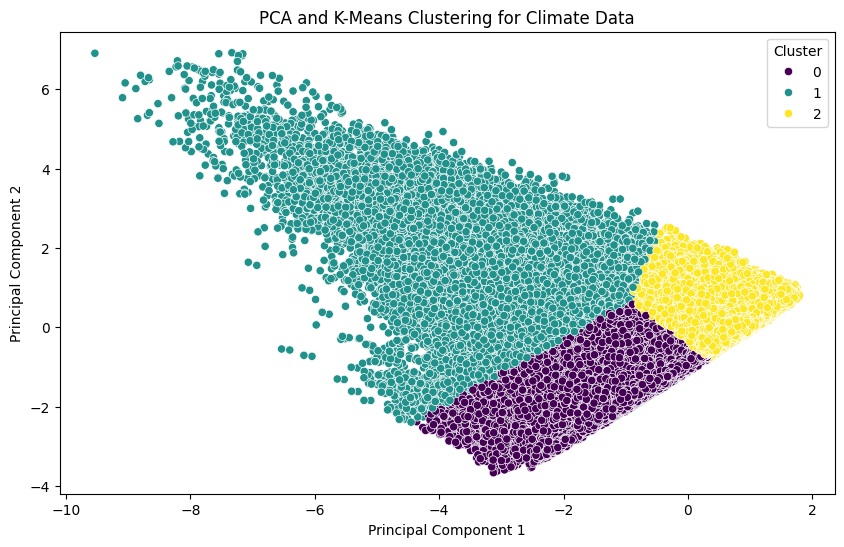

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/GlobalLandTemperaturesByCountry.csv'  # Update with your dataset file path
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

# Data Preprocessing
# Handle missing values
data = data.dropna()

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.select_dtypes(include=[np.number]))

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_

# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA and K-Means Clustering for Climate Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


In [ ]:
!pip install kaggle
!pip install pandas numpy matplotlib seaborn scikit-learn


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'

# Download datasets
!kaggle datasets download -d berkeleyearth/climate-change-earth-surface-temperature-data
!kaggle datasets download -d anniema15/air-quality-data
!kaggle datasets download -d nachiket273/water-quality

# Unzip datasets
!unzip climate-change-earth-surface-temperature-data.zip
!unzip air-quality-data.zip
!unzip water-quality.zip


Dataset URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data
License(s): CC-BY-NC-SA-4.0
climate-change-earth-surface-temperature-data.zip: Skipping, found more recently modified local copy (use --force to force download)
403 - Forbidden - Permission 'datasets.get' was denied
403 - Forbidden - Permission 'datasets.get' was denied
Archive:  climate-change-earth-surface-temperature-data.zip
replace GlobalLandTemperaturesByCity.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
unzip:  cannot find or open air-quality-data.zip, air-quality-data.zip.zip or air-quality-data.zip.ZIP.
unzip:  cannot find or open water-quality.zip, water-quality.zip.zip or water-quality.zip.ZIP.


In [ ]:
import pandas as pd

# Load datasets
climate_data = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
air_quality_data = pd.read_csv('/content/AirQualityUCI.csv')
water_quality_data = pd.read_csv('water_potability.csv')

# Display the first few rows of each dataset
print(climate_data.head())
print(air_quality_data.head())
print(water_quality_data.head())


           dt  AverageTemperature  AverageTemperatureUncertainty Country
0  1743-11-01               4.384                          2.294   Åland
1  1743-12-01                 NaN                            NaN   Åland
2  1744-01-01                 NaN                            NaN   Åland
3  1744-02-01                 NaN                            NaN   Åland
4  1744-03-01                 NaN                            NaN   Åland
                                                                                                            Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;
10/03/2004;18.00.00;2            6;1360;150;11                 9;1046;166;1056;113;1692;1268;13 6;48 9;0                                                7578;;                                                                          
10/03/2004;19.00.00;2;1292;112;9 4;955;103;1174;92;1559;972;13 3;47                             

In [ ]:
# Display column names for each dataset
print(climate_data.columns)
print(air_quality_data.columns)
print(water_quality_data.columns)


Index(['Country', 'AverageTemperature', 'AverageTemperatureUncertainty'], dtype='object')
Index(['Date;Time;CO(GT);PT08.S1(CO);NMHC(GT);C6H6(GT);PT08.S2(NMHC);NOx(GT);PT08.S3(NOx);NO2(GT);PT08.S4(NO2);PT08.S5(O3);T;RH;AH;;'], dtype='object')
Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [ ]:
# Select relevant columns from each dataset
climate_data = climate_data[['Country', 'AverageTemperature', 'AverageTemperatureUncertainty']]
air_quality_data = air_quality_data[['Date', 'Time', 'CO(GT)', 'NOx(GT)', 'NO2(GT)']]
water_quality_data = water_quality_data[['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability']]

# Handle any missing values
climate_data = climate_data.dropna()
air_quality_data = air_quality_data.dropna()
water_quality_data = water_quality_data.dropna()

# Select only numeric columns for the mean calculation
numeric_air_quality_data = air_quality_data.select_dtypes(include=[np.number])
numeric_climate_data = climate_data.select_dtypes(include=[np.number])
numeric_water_quality_data = water_quality_data.select_dtypes(include=[np.number])

# Calculate the mean of the numeric columns
air_quality_summary = numeric_air_quality_data.mean().to_frame().transpose()
climate_summary = numeric_climate_data.mean().to_frame().transpose()
water_quality_summary = numeric_water_quality_data.mean().to_frame().transpose()

# Combine the summaries into a single DataFrame
combined_data = pd.concat([climate_summary, air_quality_summary, water_quality_summary], axis=1)

# Display the combined dataset
print(combined_data)


   AverageTemperature  AverageTemperatureUncertainty     NOx(GT)    NO2(GT)  \
0           17.193354                        1.01919  168.616971  58.148873   

        ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.08599  195.968072  21917.441374     7.134338  333.224672    426.526409   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       14.357709        66.400859   3.969729    0.403282  


In [ ]:
# Repeat the mean values to create a synthetic dataset
num_samples = 100  # Number of synthetic samples
combined_data_expanded = pd.concat([combined_data] * num_samples, ignore_index=True)

# Add some random noise to create variability
combined_data_expanded += np.random.normal(0, 0.01, combined_data_expanded.shape)

# Display the expanded dataset
print(combined_data_expanded.head())


   AverageTemperature  AverageTemperatureUncertainty     NOx(GT)    NO2(GT)  \
0           17.197484                       1.007888  168.644323  58.153794   
1           17.192339                       1.022086  168.599720  58.160016   
2           17.192838                       1.030668  168.613440  58.144419   
3           17.175592                       1.010090  168.612348  58.145828   
4           17.202814                       1.040481  168.610740  58.139069   

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.074925  195.966565  21917.434966     7.129239  333.219806    426.525460   
1  7.058310  195.966931  21917.451109     7.121472  333.220955    426.536518   
2  7.091086  195.949702  21917.438652     7.139244  333.222882    426.512078   
3  7.088014  195.993287  21917.420926     7.125025  333.225307    426.535587   
4  7.062189  195.979297  21917.449353     7.136642  333.224303    426.532071   

   Organic_carbon  Trihalomethanes  Turbidit

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(combined_data_expanded)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# K-Means Clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(pca_df)
pca_df['Cluster'] = kmeans.labels_

# Add Cluster information back to the combined data
combined_data_expanded['Cluster'] = kmeans.labels_

# Display the clustered data
print(combined_data_expanded)


    AverageTemperature  AverageTemperatureUncertainty     NOx(GT)    NO2(GT)  \
0            17.197484                       1.007888  168.644323  58.153794   
1            17.192339                       1.022086  168.599720  58.160016   
2            17.192838                       1.030668  168.613440  58.144419   
3            17.175592                       1.010090  168.612348  58.145828   
4            17.202814                       1.040481  168.610740  58.139069   
..                 ...                            ...         ...        ...   
95           17.194089                       1.020951  168.604638  58.154317   
96           17.193469                       1.013159  168.624919  58.154445   
97           17.201451                       1.029013  168.597701  58.157352   
98           17.190000                       1.019335  168.615593  58.135672   
99           17.200350                       1.021480  168.630478  58.158366   

          ph    Hardness        Solids 

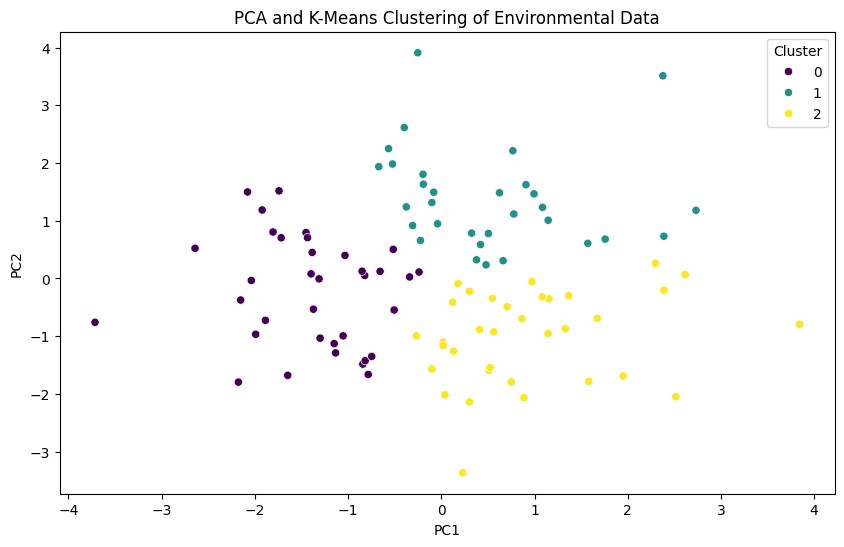

In [ ]:
# Visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=pca_df, palette='viridis')
plt.title('PCA and K-Means Clustering of Environmental Data')
plt.show()
